In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/planning_optimization/Planning_optimization

/content/drive/MyDrive/Colab Notebooks/planning_optimization/Planning_optimization


#Read Result

In [35]:
import numpy as np
import time
import os
import pickle
import matplotlib.pyplot as plt
import random
import re
import json

In [36]:
TypeList = ["Type1Large","Type2Large","Type3Large","Type4Large","Type5Large",
             "Type1Small","Type2Small","Type3Small","Type4Small","Type5Small"]

In [37]:
resultTB =  np.zeros(shape=(10,25)) #10 type, 25 instance
timeTB =  np.zeros(shape=(10,25))
resultGA =  np.zeros(shape=(10,25))
timeGA =  np.zeros(shape=(10,25))

resultIP = np.zeros(shape=(10,25))
timeIP = np.zeros(shape=(10,25))
resultCP = np.zeros(shape=(10,25))
timeCP = np.zeros(shape=(10,25))

In [38]:
# Small
small_N_list = [10,20,30,40,50]
small_m_list = [10,20,30,40,50]
small_M_list = [15,30,50,75,100]

# Large
large_N_list = [100,250,500,750,1000]
large_m_list = [20,30,40,50,60]
large_M_list = [30,50,75,100,125]

In [66]:
# Check feasible - Tabu and GA
def postprocess(fileName, m, M):
  f = open(fileName,"r")
  name = f.readline()
  time = f.readline()
  result = f.readline()
  solution = f.readline()
  check = True
  temp = f.readline()
  while temp:
    productivity = float(re.search(r'\(([\d.]+)\)', temp).group(1))
    if productivity < m or productivity > M:
      check = False
      break
    temp = f.readline()
  f.close()
  if check:
    result = float(result.split()[1])
    time = float(time.split()[1])
  else:
    result = 100000.0
    time = float(time.split()[1])
  return result, time

In [ ]:
# Tabu
## get large result
for x in range(0, 5):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(large_N_list[i])+"-"+str(large_m_list[j])+"-"+str(large_M_list[j])
      print(instanceName)

      fileName = "results/TabuSearch/TabuSearch/"+TypeList[x]+"/TS("+instanceName+").txt"
      result, time = postprocess(fileName, large_m_list[j], large_M_list[j])
      resultTB[x][5*i+j] = result
      timeTB[x][5*i+j] = time

## get small result
for x in range(5, 10):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(small_N_list[i])+"-"+str(small_m_list[j])+"-"+str(small_M_list[j])
      print(instanceName)

      fileName = "results/TabuSearch/TabuSearch/"+TypeList[x]+"/TS("+instanceName+").txt"
      result, time = postprocess(fileName, small_m_list[j], small_M_list[j])
      resultTB[x][5*i+j] = result
      timeTB[x][5*i+j] = time

In [ ]:
# GA
## get large result
for x in range(0, 5):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(large_N_list[i])+"-"+str(large_m_list[j])+"-"+str(large_M_list[j])
      print(instanceName)

      fileName = "results/GeneticAlgorithm/150_population/"+TypeList[x]+"/GA("+instanceName+")_seed0.txt"
      result, time = postprocess(fileName, large_m_list[j], large_M_list[j])
      resultGA[x][5*i+j] = result
      timeGA[x][5*i+j] = time

## get small result
for x in range(5, 10):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(small_N_list[i])+"-"+str(small_m_list[j])+"-"+str(small_M_list[j])
      print(instanceName)

      fileName = "results/GeneticAlgorithm/150_population/"+TypeList[x]+"/GA("+instanceName+")_seed0.txt"
      result, time = postprocess(fileName, small_m_list[j], small_M_list[j])
      resultGA[x][5*i+j] = result
      timeGA[x][5*i+j] = time

In [ ]:
# IP
## get large result
for x in range(0, 5):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(large_N_list[i])+"_"+str(large_m_list[j])+"_"+str(large_M_list[j])
      print(instanceName)

      fileName = "results/data_v2/"+TypeList[x]+"/integer_programming/result_sample_"+instanceName+".json"
      f = open(fileName,"r")
      datajson = json.load(f)
      time = datajson["Time"]
      result = datajson["Result"]
      if result == "No Solution":
        result = 100000.0
      resultIP[x][5*i+j] = result
      timeIP[x][5*i+j] = time
      f.close() 

## get small result
for x in range(5, 10):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(small_N_list[i])+"_"+str(small_m_list[j])+"_"+str(small_M_list[j])
      print(instanceName)

      fileName = "results/data_v2/"+TypeList[x]+"/integer_programming/result_sample_"+instanceName+".json"
      f = open(fileName,"r")
      datajson = json.load(f)
      time = datajson["Time"]
      result = datajson["Result"]
      if result == "No Solution":
        result = 100000.0
      resultIP[x][5*i+j] = result
      timeIP[x][5*i+j] = time
      f.close()

In [ ]:
# CP
## get large result
for x in range(0, 5):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(large_N_list[i])+"_"+str(large_m_list[j])+"_"+str(large_M_list[j])
      print(instanceName)

      fileName = "results/data_v2/"+TypeList[x]+"/constraint_programming/result_sample_"+instanceName+".json"
      f = open(fileName,"r")
      datajson = json.load(f)
      time = datajson["Time"]
      result = datajson["Result"]
      if result == "No Solution":
        result = 100000.0
      resultCP[x][5*i+j] = result
      timeCP[x][5*i+j] = time
      f.close() 

## get small result
for x in range(5, 10):
  print(TypeList[x])
  for i in range(5):
    for j in range(5):
      instanceName = str(small_N_list[i])+"_"+str(small_m_list[j])+"_"+str(small_M_list[j])
      print(instanceName)

      fileName = "results/data_v2/"+TypeList[x]+"/constraint_programming/result_sample_"+instanceName+".json"
      f = open(fileName,"r")
      datajson = json.load(f)
      time = datajson["Time"]
      result = datajson["Result"]
      if result == "No Solution":
        result = 100000.0
      resultCP[x][5*i+j] = result
      timeCP[x][5*i+j] = time
      f.close()

In [75]:
pickle.dump(resultTB, open('evaluation/resultTB.pkl', 'wb'))
pickle.dump(timeTB, open('evaluation/timeTB.pkl', 'wb'))
pickle.dump(resultGA, open('evaluation/resultGA.pkl', 'wb'))
pickle.dump(timeGA, open('evaluation/timeGA.pkl', 'wb'))

pickle.dump(resultCP, open('evaluation/resultCP.pkl', 'wb'))
pickle.dump(timeCP, open('evaluation/timeCP.pkl', 'wb'))
pickle.dump(resultIP, open('evaluation/resultIP.pkl', 'wb'))
pickle.dump(timeIP, open('evaluation/timeIP.pkl', 'wb'))

In [76]:
resultCP = pickle.load(open('evaluation/resultCP.pkl', 'rb'))
timeCP = pickle.load(open('evaluation/timeCP.pkl', 'rb'))
resultIP = pickle.load(open('evaluation/resultIP.pkl', 'rb'))
timeIP = pickle.load(open('evaluation/timeIP.pkl', 'rb'))

resultTB = pickle.load(open('evaluation/resultTB.pkl', 'rb'))
timeTB = pickle.load(open('evaluation/timeTB.pkl', 'rb'))
resultGA = pickle.load(open('evaluation/resultGA.pkl', 'rb'))
timeGA = pickle.load(open('evaluation/timeGA.pkl', 'rb'))

In [ ]:
for i in range(0, 10):
  print(resultTB[i])

In [ ]:
for i in range(0, 10):
  print(resultGA[i])

In [ ]:
for i in range(0, 10):
  print(resultIP[i])

In [ ]:
for i in range(0, 10):
  print(resultCP[i])

# Đánh giá số lời giải hợp lệ

In [78]:
count_TB = np.zeros(shape=(10))
count_GA = np.zeros(shape=(10))
count_IP = np.zeros(shape=(10))
count_CP = np.zeros(shape=(10))

for x in range(10):
    for i in range(25):
        if (resultTB[x][i] < 100000):
            count_TB[x]+=1
        if (resultGA[x][i] < 100000):
            count_GA[x]+=1   

        if (resultIP[x][i] < 100000):
            count_IP[x]+=1
        if (resultCP[x][i] < 100000):
            count_CP[x]+=1

print(count_IP*100/25) 
print(count_CP*100/25) 
print(count_TB*100/25)     
print(count_GA*100/25)        

[100.  80. 100. 100.  84. 100. 100. 100. 100. 100.]
[100.  76. 100. 100.  76. 100. 100. 100. 100. 100.]
[ 44.   0. 100.  60.   8. 100.  60. 100. 100.  76.]
[ 28.   0.  68.  44.   8. 100.  60. 100. 100.  72.]


# Đánh giá số lời giải tối ưu

In [86]:
best = np.array(resultCP)
for x in range(10):
    for i in range(25):
        best[x][i] = min(resultCP[x][i],resultIP[x][i],resultTB[x][i],resultGA[x][i])

In [88]:
count_TB = np.zeros(shape=(10))
count_GA = np.zeros(shape=(10))
count_IP = np.zeros(shape=(10))
count_CP = np.zeros(shape=(10))
for x in range(10):
    for i in range(25):
        if (best[x][i]>=100000):
            print(TypeList[x]+"-"+str(i))
            continue
        
        if (resultTB[x][i] <= best[x][i]):
            count_TB[x]+=1
        if (resultGA[x][i] <= best[x][i]):
            count_GA[x]+=1   
        if (resultIP[x][i] <= best[x][i]):
            count_IP[x]+=1
        if (resultCP[x][i] <= best[x][i]):
            count_CP[x]+=1
            
print(count_IP*100/25) 
print(count_CP*100/25) 
print(count_TB*100/25)     
print(count_GA*100/25)

Type2Large-20
Type2Large-21
Type2Large-22
Type5Large-15
Type5Large-20
Type5Large-21
[ 52.  60.  72.  36.  44. 100. 100. 100. 100.  92.]
[ 92.  52.  92.  96.  52. 100. 100. 100. 100.  96.]
[ 0.  0.  8.  0.  0. 44.  4. 84. 52. 12.]
[ 0.  0.  0.  0.  0. 32. 12. 64. 36. 16.]


# So sánh thời gian

In [94]:
avgTimeTabuType = np.average(timeTB, axis=1)
avgTimeGAType = np.average(timeGA, axis=1)
avgTimeIPType = np.average(timeIP, axis=1)
avgTimeCPType = np.average(timeCP, axis=1)

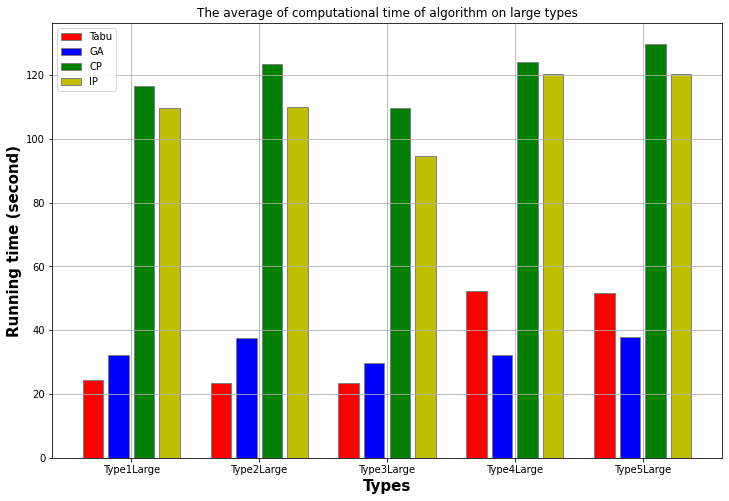

In [98]:
# Time Large
index = [0,1,2,3,4]

TB_time = [avgTimeTabuType[i] for i in index]
GA_time = [avgTimeGAType[i] for i in index]
IP_time = [avgTimeIPType[i] for i in index]
CP_time = [avgTimeCPType[i] for i in index]
x_name = [TypeList[i] for i in index]
# set width of bar
barWidth = 0.8

fig = plt.subplots(figsize =(12,8))
 
# Set position of bar on X axis
pos = np.arange(len(TB_time))*5

# Make the plot
plt.bar(pos-1.5, TB_time, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tabu')
plt.bar(pos-0.5, GA_time, color ='b', width = barWidth,
        edgecolor ='grey', label ='GA')
plt.bar(pos+0.5, CP_time, color ='g', width = barWidth,
        edgecolor ='grey', label ='CP')
plt.bar(pos+1.5, IP_time, color ='y', width = barWidth,
        edgecolor ='grey', label ='IP')
 
# Adding Xticks
plt.xlabel('Types', fontweight ='bold', fontsize = 15)
plt.ylabel('Running time (second)', fontweight ='bold', fontsize = 15)
plt.xticks(pos,x_name)
plt.title("The average of computational time of algorithm on large types") 
plt.grid()
plt.legend()

plt.savefig("images/time_Large.png")
plt.show()

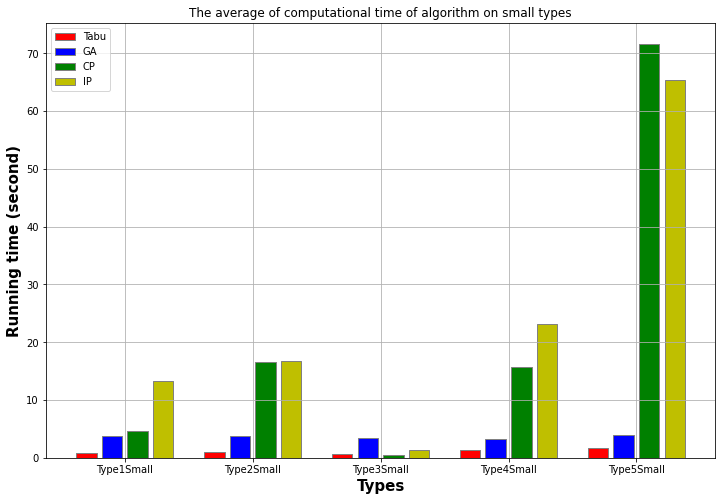

In [99]:
# Time Large
index = [5,6,7,8,9]

TB_time = [avgTimeTabuType[i] for i in index]
GA_time = [avgTimeGAType[i] for i in index]
IP_time = [avgTimeIPType[i] for i in index]
CP_time = [avgTimeCPType[i] for i in index]
x_name = [TypeList[i] for i in index]
# set width of bar
barWidth = 0.8

fig = plt.subplots(figsize =(12,8))
 
# Set position of bar on X axis
pos = np.arange(len(TB_time))*5

# Make the plot
plt.bar(pos-1.5, TB_time, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tabu')
plt.bar(pos-0.5, GA_time, color ='b', width = barWidth,
        edgecolor ='grey', label ='GA')
plt.bar(pos+0.5, CP_time, color ='g', width = barWidth,
        edgecolor ='grey', label ='CP')
plt.bar(pos+1.5, IP_time, color ='y', width = barWidth,
        edgecolor ='grey', label ='IP')
 
# Adding Xticks
plt.xlabel('Types', fontweight ='bold', fontsize = 15)
plt.ylabel('Running time (second)', fontweight ='bold', fontsize = 15)
plt.xticks(pos,x_name)
plt.title("The average of computational time of algorithm on small types") 
plt.grid()
plt.legend()

plt.savefig("images/time_Small.png")
plt.show()

# Tính độ hội tụ

## So sánh GA với Tabu

### Read data

In [109]:
NUMBEROFGEN=500

genTB = [[] for _ in range(10)]
genGA = [[] for _ in range(10)]

In [ ]:
# Tabu
i=4
j=4  
for x in range(5):
    print(TypeList[x])
    instanceName = str(large_N_list[i])+"-"+str(large_m_list[j])+"-"+str(large_M_list[j])
    print(instanceName)

    fileName= "results/TabuSearch/TabuSearch_gen/"+TypeList[x]+"/TS("+instanceName+")_gen.txt"
    f= open(fileName,"r")
    f.readline() #name
    f.readline() #result
    for gen in range(NUMBEROFGEN):
        best = float(f.readline().split()[2])
        genTB[x].append(int(best))
    f.close()

for x in range(5, 10):
    print(TypeList[x])
    instanceName = str(small_N_list[i])+"-"+str(small_m_list[j])+"-"+str(small_M_list[j])
    print(instanceName)

    fileName= "results/TabuSearch/TabuSearch_gen/"+TypeList[x]+"/TS("+instanceName+")_gen.txt"
    f= open(fileName,"r")
    f.readline() #name
    f.readline() #result
    for gen in range(NUMBEROFGEN):
        best = float(f.readline().split()[2])
        genTB[x].append(int(best))
    f.close()

In [ ]:
# GA
i=4
j=4  
for x in range(5):
    print(TypeList[x])
    instanceName = str(large_N_list[i])+"-"+str(large_m_list[j])+"-"+str(large_M_list[j])
    print(instanceName)

    fileName= "results/GeneticAlgorithm/150_population/"+TypeList[x]+"/GA("+instanceName+")_seed0_gen.txt"
    f= open(fileName,"r")
    f.readline() #name
    f.readline() #cost
    for gen in range(NUMBEROFGEN):
        best = float(f.readline().split()[3].replace(")",""))
        genGA[x].append(int(best))
    f.close()

for x in range(5, 10):
    print(TypeList[x])
    instanceName = str(small_N_list[i])+"-"+str(small_m_list[j])+"-"+str(small_M_list[j])
    print(instanceName)

    fileName= "results/GeneticAlgorithm/150_population/"+TypeList[x]+"/GA("+instanceName+")_seed0_gen.txt"
    f= open(fileName,"r")
    f.readline() #name
    f.readline() #cost
    for gen in range(NUMBEROFGEN):
        best = float(f.readline().split()[3].replace(")",""))
        genGA[x].append(int(best))
    f.close()

### Compare

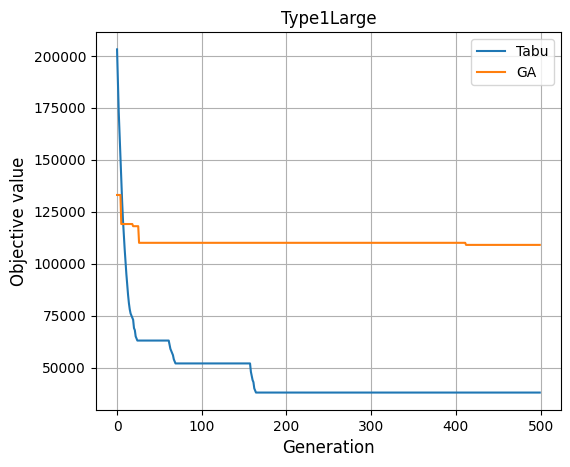

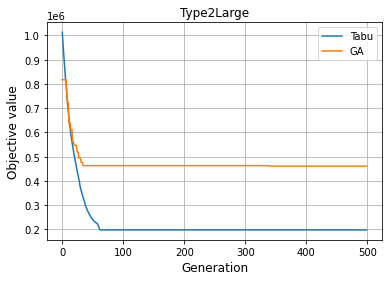

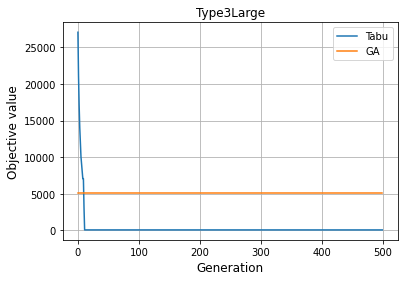

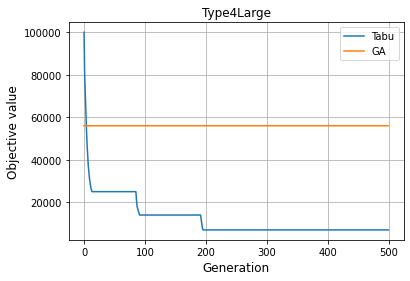

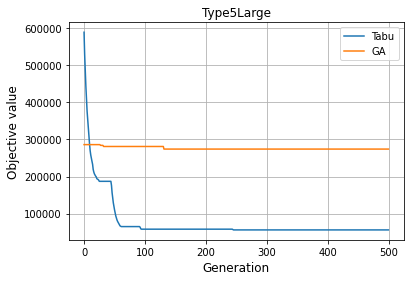

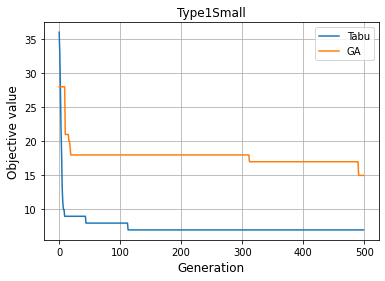

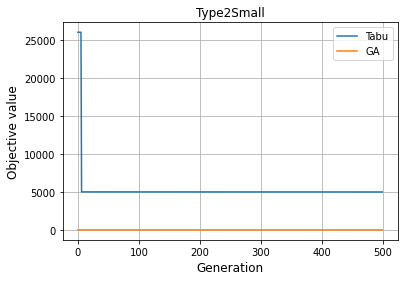

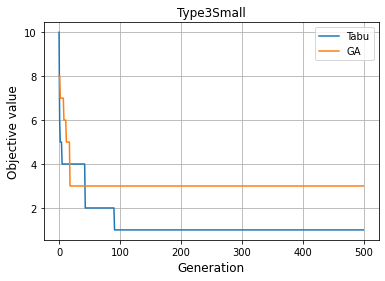

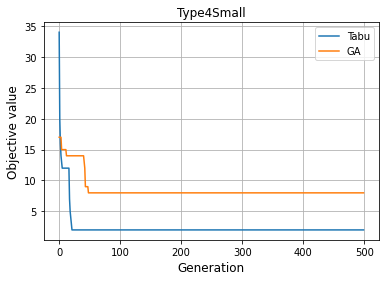

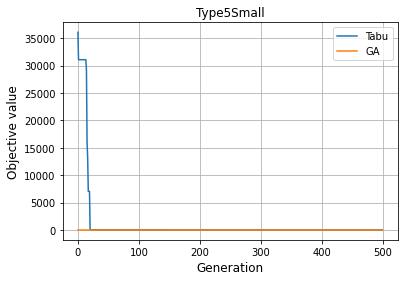

<Figure size 432x288 with 0 Axes>

In [116]:
for x in range(10):
    ax = plt.figure(num=1, figsize=(6, 5), dpi=100).gca()

    plt.grid()
    plt.title(TypeList[x])
    plt.xlabel("Generation", fontsize=12)
    plt.ylabel("Objective value", fontsize = 12)

    gen = np.arange(NUMBEROFGEN)

    GA = genGA[x]
    TB = genTB[x]

    plt.plot(gen,TB,label = "Tabu")
    plt.plot(gen,GA,label = "GA")
    
    plt.legend()
    plt.show()
    plt.savefig("images/converge_{}.png".format(TypeList[x]))

## So sánh GA với population 50, 150, 300 đối với Type1Small

> Indented block



### Load Data

In [123]:
NUMBEROFGEN=500

genGA50 = [[[] for i in range(5)] for j in range(5)]
genGA150 = [[[] for i in range(5)] for j in range(5)]
genGA300 = [[[] for i in range(5)] for j in range(5)]

In [124]:
# GA
x = 5 
for i in range(5):
  for j in range(5):
    print(TypeList[x])
    instanceName = str(small_N_list[i])+"-"+str(small_m_list[j])+"-"+str(small_M_list[j])
    print(instanceName)

    fileName= "results/GeneticAlgorithm/50_population/"+TypeList[x]+"/GA("+instanceName+")_seed0_gen.txt"
    f= open(fileName,"r")
    f.readline() #name
    f.readline() #cost
    for gen in range(NUMBEROFGEN):
        best = float(f.readline().split()[3].replace(")",""))
        genGA50[i][j].append(int(best))
    f.close()

    fileName= "results/GeneticAlgorithm/150_population/"+TypeList[x]+"/GA("+instanceName+")_seed0_gen.txt"
    f= open(fileName,"r")
    f.readline() #name
    f.readline() #cost
    for gen in range(NUMBEROFGEN):
        best = float(f.readline().split()[3].replace(")",""))
        genGA150[i][j].append(int(best))
    f.close()

    fileName= "results/GeneticAlgorithm/300_population/"+TypeList[x]+"/GA("+instanceName+")_seed0_gen.txt"
    f= open(fileName,"r")
    f.readline() #name
    f.readline() #cost
    for gen in range(NUMBEROFGEN):
        best = float(f.readline().split()[3].replace(")",""))
        genGA300[i][j].append(int(best))
    f.close()


Type1Small
10-10-15
Type1Small
10-20-30
Type1Small
10-30-50
Type1Small
10-40-75
Type1Small
10-50-100
Type1Small
20-10-15
Type1Small
20-20-30
Type1Small
20-30-50
Type1Small
20-40-75
Type1Small
20-50-100
Type1Small
30-10-15
Type1Small
30-20-30
Type1Small
30-30-50
Type1Small
30-40-75
Type1Small
30-50-100
Type1Small
40-10-15
Type1Small
40-20-30
Type1Small
40-30-50
Type1Small
40-40-75
Type1Small
40-50-100
Type1Small
50-10-15
Type1Small
50-20-30
Type1Small
50-30-50
Type1Small
50-40-75
Type1Small
50-50-100


### Compare

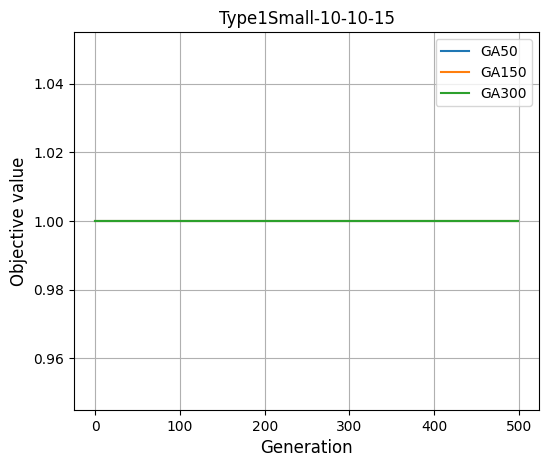

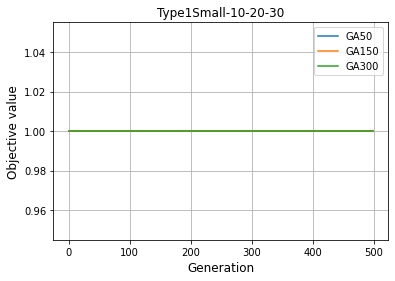

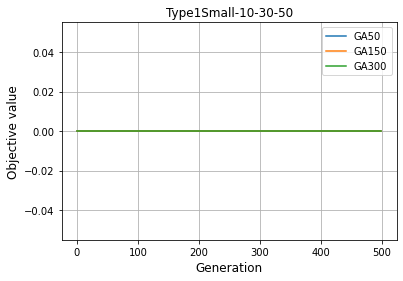

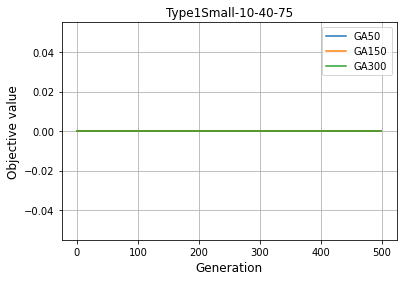

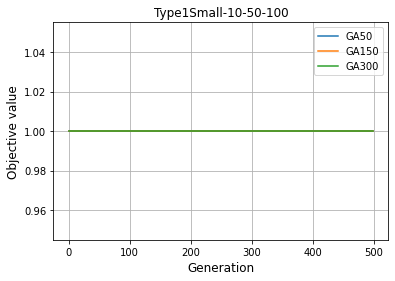

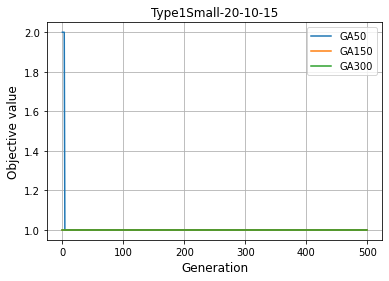

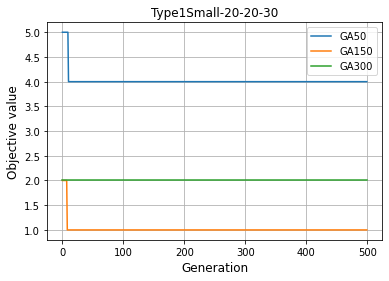

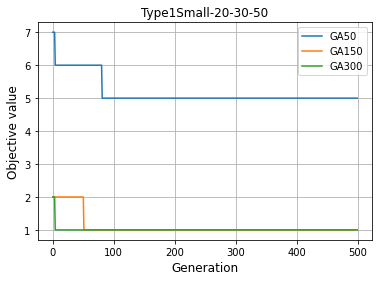

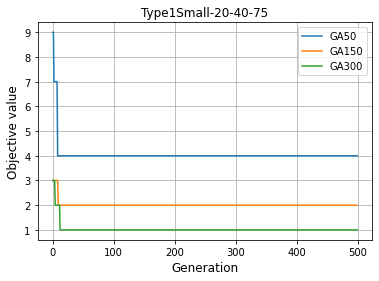

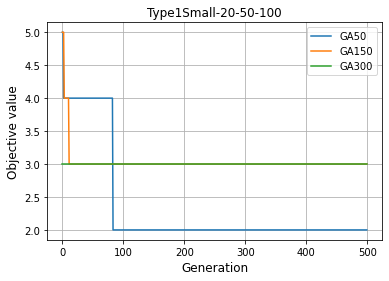

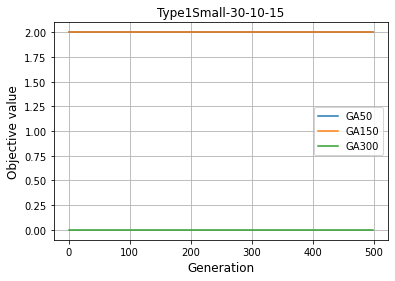

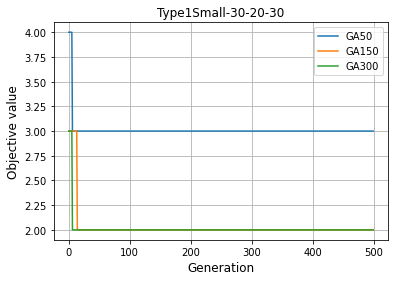

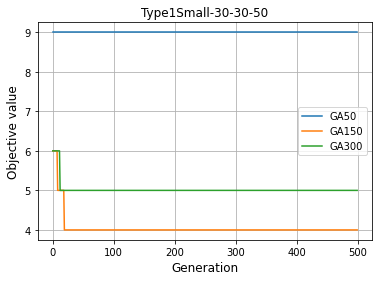

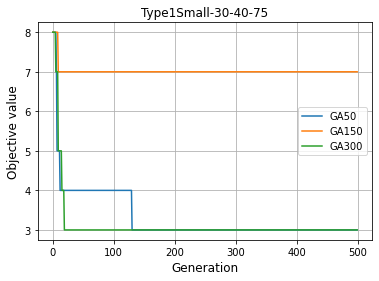

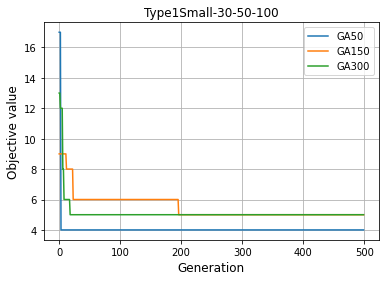

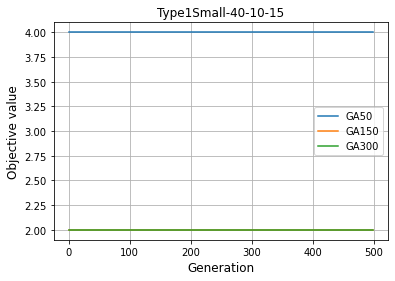

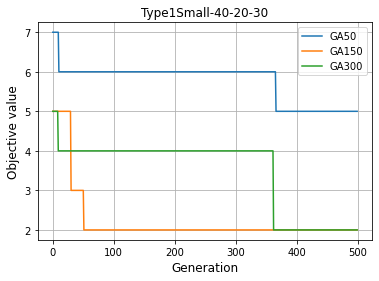

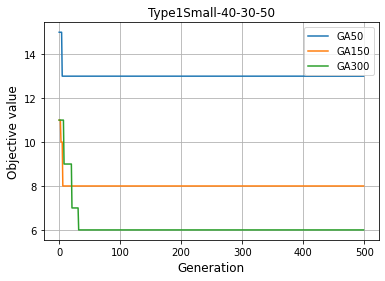

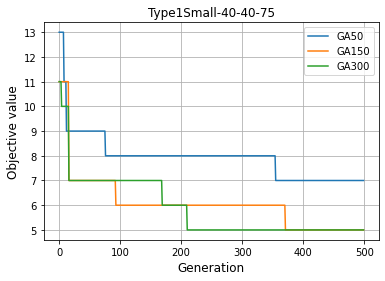

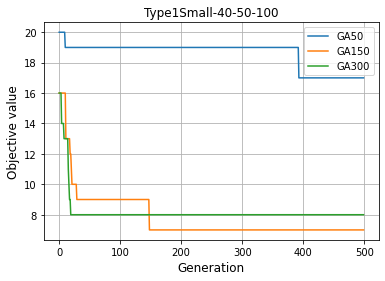

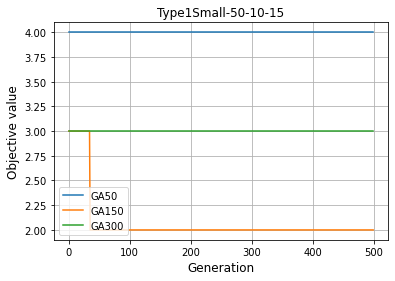

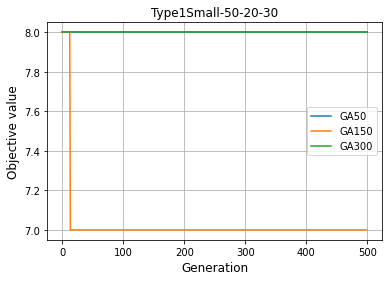

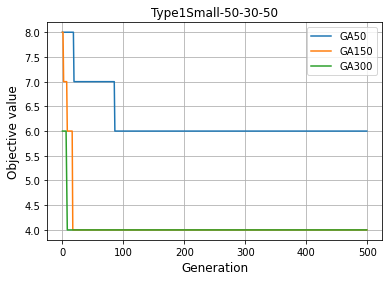

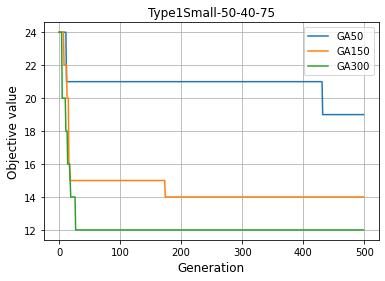

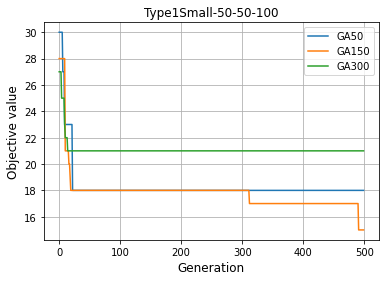

<Figure size 432x288 with 0 Axes>

In [125]:
x = 5
for i in range(5):
  for j in range(5):
    ax = plt.figure(num=1, figsize=(6, 5), dpi=100).gca()
    instanceName = str(small_N_list[i])+"-"+str(small_m_list[j])+"-"+str(small_M_list[j])
    plt.grid()
    plt.title(TypeList[x] +"-"+ instanceName)
    plt.xlabel("Generation", fontsize=12)
    plt.ylabel("Objective value", fontsize = 12)

    gen = np.arange(NUMBEROFGEN)

    GA50 = genGA50[i][j]
    GA150 = genGA150[i][j]
    GA300 = genGA300[i][j]

    plt.plot(gen,GA50,label = "GA50")
    plt.plot(gen,GA150,label = "GA150")
    plt.plot(gen,GA300,label = "GA300")
    
    plt.legend()
    plt.show()
    plt.savefig("images/converge_Type1Small-{}.png".format(instanceName))